作业8
• 对于作业5中的星系，依据fits图像画出其一维的表
面亮度轮廓，并计算其星等
• 注意流量单位
• 一维轮廓：
✓椭圆测光：椭圆是等面亮度轮廓，半径沿着长轴方向
✓圆测光: 圆孔径内的平均表面亮度
• 星等：
✓积分（求和）到某个等亮度半径处
✓根据面亮度轮廓模型，积分到无穷远处

Text(0.5, 1.0, 'DESI NGC 5557')

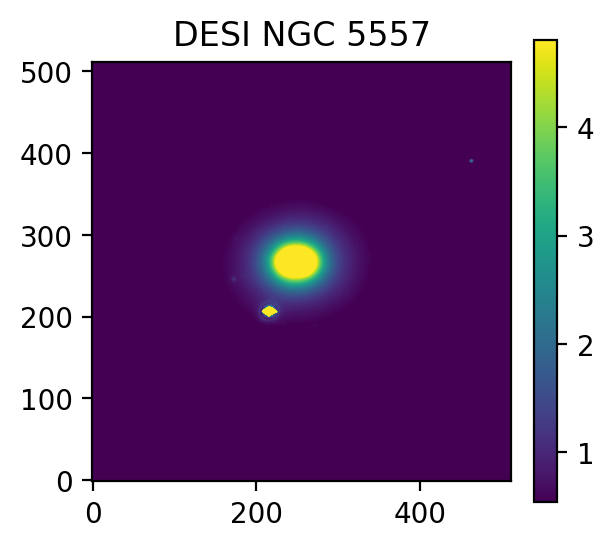

In [110]:
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.wcs import WCS

DESI = fits.open('cutout_214.6066_36.4927.fits')

data = DESI[0].data

plt.figure(figsize=(3,3), dpi=200)
plt.imshow(data, vmin=0.54, vmax=4.8, origin='lower')
plt.colorbar(fraction = 0.05)
plt.title('DESI NGC 5557')

In [108]:
from autoprof import Pipeline

config_file = './galaxy_profile/test_config.txt'
PIPELINE = Pipeline.Isophote_Pipeline(loggername='xxx')
PIPELINE.Process_ConfigFile(config_file=config_file)


testimage: head background at: 0.0 sec
testimage: head background at: 0.0 sec
testimage: head psf at: 1.0 sec
testimage: head psf at: 1.0 sec
testimage: PSF assumed to be: 4.0000e+00 pix
testimage: head center at: 1.0 sec
testimage: head center at: 1.0 sec
testimage: head isophoteinit at: 2.2 sec
testimage: head isophoteinit at: 2.2 sec
testimage: init scale: 237.376314 pix
testimage: head isophotefit at: 4.2 sec
testimage: head isophotefit at: 4.2 sec
testimage: Completed isohpote fit in 235 itterations
testimage: head isophoteextract at: 15.7 sec
testimage: head isophoteextract at: 15.7 sec
testimage: R complete in range [1.0,368.4]
testimage: head checkfit at: 17.3 sec
testimage: head checkfit at: 17.3 sec
testimage: head writeprof at: 17.5 sec
testimage: head writeprof at: 17.5 sec
testimage: Processing Complete! (at 17.5 sec)
testimage: Processing Complete! (at 17.5 sec)


{'background': 0.999046802520752,
 'psf': 0.0002942085266113281,
 'center': 1.1950459480285645,
 'isophoteinit': 2.016838788986206,
 'isophotefit': 11.444736957550049,
 'isophoteextract': 1.6451389789581299,
 'checkfit': 0.18798017501831055,
 'writeprof': 0.00841212272644043}

![Example Image](./galaxy_profile/fit_ellipse_testimage.jpg)

![Example Image](./galaxy_profile/photometry_testimage.jpg)


In [112]:
import pandas as pd
dat = pd.read_csv('./galaxy_profile/testimage.prof', header=1)
dat

R         SB          SB_e     totmag  totmag_e     ellip  \
0    0.262000  17.092673  6.140689e-07  19.466914  0.001913  0.479344   
1    0.288200  17.092673  6.355799e-07  19.259951  0.001676  0.479344   
2    0.317020  17.092674  6.588771e-07  19.052987  0.001415  0.479344   
3    0.348722  17.092674  6.812414e-07  18.846024  0.001238  0.479344   
4    0.383594  17.092674  7.020016e-07  18.639061  0.001123  0.479344   
..        ...        ...           ...        ...       ...       ...   
58  65.929082  24.174502  2.467159e-02  10.592996  0.002780  0.158602   
59  72.521991  25.519933  2.604948e-02  10.586938  0.002789  0.158493   
60  79.774190  99.999000  9.999900e+01  10.585334  0.002793  0.158493   
61  87.751609  99.999000  9.999900e+01  10.585334  0.002793  0.158493   
62  96.526769  99.999000  9.999900e+01  10.585334  0.002793  0.158493   

     ellip_e         pa      pa_e  pixels  maskedpixels  totmag_direct  
0   0.001000  89.869803  0.057296      15             0      19.248592  
1   0.001000  89.869803  0.057296      15             0      19.248592  
2   0.001000  89.869803  0.057296      15             0      19.248592  
3   0.001000  89.869803  0.057296      15             0      19.248592  
4   0.001000  89.869803  0.057296      15             0      18.808363  
..       ...        ...       ...     ...           ...            ...  
58  0.001000  77.945325  1.161707    1383             8      10.553279  
59  0.001123  82.579165  0.358423   15347            40      10.546838  
60  0.001123  82.579165  0.358423   13229             1      10.546582  
61  0.001123  82.579165  0.358423    8387            61      10.548515  
62  0.001123  82.579165  0.358423    3885             7      10.550314  

[63 rows x 12 columns]

0     0.001913
1     0.001676
2     0.001415
3     0.001238
4     0.001123
        ...   
58    0.002780
59    0.002789
60    0.002793
61    0.002793
62    0.002793
Name: totmag_e, Length: 63, dtype: float64

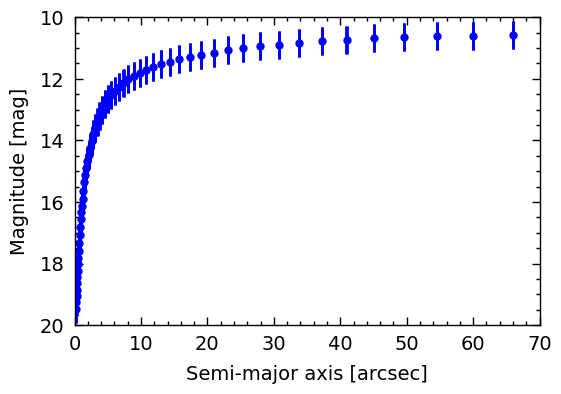

In [145]:
plt.style.use(['science','nature','no-latex'])
R = dat['R']
mag = dat['totmag']
mag_e = dat['totmag_e']
plt.figure(figsize=(3,2), dpi=200)
# plt.scatter(R, mag, c='r', s=3)
plt.errorbar(R, mag, xerr=mag_e, fmt='o', color='blue', elinewidth=1, capsize=5, capthick=1, ms=2)
plt.gca().invert_yaxis() 
plt.xlabel('Semi-major axis [arcsec]')
plt.ylabel('Magnitude [mag]')
plt.xlim(0, 70)
plt.ylim(20, 10)
mag_e

• 对于所有波段K改正为0mag的天体来说，其SED可以由什么函数描述$f(\lambda)$?

![Example Image](./K-1.jpg)

![Example Image](./K-2.jpg)

作业9、某标准烛光B波段的星等测量值为25等（内禀绝对
星等为-3.0），测量误差为0.1个星等，该天体方向
上银河系尘埃的红化E(B-V)=0.2星等（不确定性为
0.05个星等），请问该天体的距离为多少，距离测
量的不确定性是多少？
• 假设银河系的消光曲线Rv=3.1

解：$m_B = 25 mag$, $M_B = -3 mag$,  ${m_B}_e = 0.1 mag$, $E(B-V) = 0.2 mag$, $E(B-V)_e = 0.05 mag$, $R_v = 3.1$

$m_B - M_B = 5lgd - 5 + A_B$

$A_B = R_v \times E(B-V)$

$d = 10^{\frac{m_B-M_B+5-R_v \cdot E(B-V)}{5}}$

$d = 3 \times 10^6 pc$

$d_e = 62169 pc$

作业10
• 某星系（Ra=180，Dec=-10），观测到其Ha
谱线的（真空中）波长被红移到7000A处，在r
波段观测到的其AB星等为20等，其光谱的能量
分布fλ 在静止波长（5000-7500A）范围内近似
为常数，请计算其r波段的绝对星等。
• 宇宙学（$H_0 \sim 100 h kms^{-1} Mpc^{-1} Ω_0=0.28，
Ω_Λ=0.72$）
• r波段的波长范围近似为5500-6700A，滤光片响应
曲线近似为常数0.6

解：红移$z = \frac{\lambda_{observed}-\lambda_{emitted}}{\lambda_{emitted}} = 0.067$

$v = H_0 \times d$, $v = c \times z$

$d = \frac{c \times z}{H_0}$

$d = \frac{201}{h} Mpc$, $h = 0.7$

$d = 287 Mpc$

$d_l = d*(1+z) = 306.229 Mpc$

这里$f_{\lambda} = 常数$，所以K改正等于0

$M_r = m_r - 5(logd_l - 1) = -17.43 mag$

In [ ]:
# 距离不能这么简单的算了